In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_08 = pd.read_csv('all_alpha_08.csv')
df_08.describe()

,Displ,Unadj Cmb MPG
count,2404.000000,2205.000000
mean,3.748918,23.916104
std,1.335785,6.366170
min,1.300000,10.018400
25%,2.500000,19.113900
50%,3.500000,23.921300
75%,4.800000,27.869300
max,8.400000,65.777800


In [262]:
df_18 = pd.read_csv('all_alpha_18.csv')
df_18.describe()

,Displ,Cyl,Air Pollution Score,Greenhouse Gas Score
count,1609.000000,1609.000000,1611.000000,1611.000000
mean,3.055687,5.479180,3.958411,4.711359
std,1.344574,1.749121,1.824303,1.657429
min,1.200000,3.000000,1.000000,1.000000
25%,2.000000,4.000000,3.000000,4.000000
50%,3.000000,6.000000,3.000000,5.000000
75%,3.600000,6.000000,5.000000,6.000000
max,8.000000,16.000000,10.000000,10.000000


In [263]:
df_08 = df_08.drop(columns=['Unadj Cmb MPG', 'FE Calc Appr'])
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG',
       'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [264]:
df_18 = df_18.drop(columns=['Stnd Description', 'Comb CO2'])
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Underhood ID', 'Veh Class', 'Air Pollution Score', 'City MPG',
       'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [265]:
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

In [266]:
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [267]:
(df_08.columns != df_18.columns).sum()

0

In [268]:
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [269]:
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [270]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 0 to 1610
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1606 non-null   object 
 1   displ                 1606 non-null   float64
 2   cyl                   1606 non-null   float64
 3   trans                 1606 non-null   object 
 4   drive                 1606 non-null   object 
 5   fuel                  1606 non-null   object 
 6   cert_region           1606 non-null   object 
 7   stnd                  1606 non-null   object 
 8   underhood_id          1606 non-null   object 
 9   veh_class             1606 non-null   object 
 10  air_pollution_score   1606 non-null   int64  
 11  city_mpg              1606 non-null   object 
 12  hwy_mpg               1606 non-null   object 
 13  cmb_mpg               1606 non-null   object 
 14  greenhouse_gas_score  1606 non-null   int64  
 15  smartway             

In [271]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'stnd', 'underhood_id', 'veh_class', 'air_pollution_score', 'city_mpg',
       'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [272]:
df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'stnd', 'underhood_id', 'veh_class', 'air_pollution_score', 'city_mpg',
       'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [273]:
(df_08.columns != df_18.columns).sum()

0

In [274]:
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)', expand=True).astype(float)

In [275]:
df_08['fuel'].value_counts()

Gasoline       2113
ethanol/gas      66
diesel            7
CNG               2
ethanol           1
Name: fuel, dtype: int64

In [276]:
df_18['fuel'].value_counts()

Gasoline                1489
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Name: fuel, dtype: int64

In [277]:
hybrid_08 = df_08[df_08['fuel'].str.contains('/')]

In [278]:
df1 = hybrid_08.copy()
df2 = hybrid_08.copy()

In [279]:
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for column in split_columns:
    df1[column] = df1[column].apply(lambda x: x.split("/")[0])
    df2[column] = df2[column].apply(lambda x: x.split("/")[1])

In [280]:
new_rows = pd.concat([df1, df2])
new_rows

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8.0,Auto-L4,2WD,ethanol,FC,B4,8GMXT05.3381,SUV,7,11,15,12,6,no
317,CHEVROLET Avalanche 1500,5.3,8.0,Auto-L4,4WD,ethanol,FC,B4,8GMXT05.3381,SUV,7,11,14,12,6,no
321,CHEVROLET Avalanche 1500,5.3,8.0,Auto-L4,2WD,ethanol,FC,B5,8GMXT05.3373,SUV,6,11,15,12,6,no
322,CHEVROLET Avalanche 1500,5.3,8.0,Auto-L4,4WD,ethanol,FC,B5,8GMXT05.3373,SUV,6,11,14,12,6,no
380,CHEVROLET Express 1500,5.3,8.0,Auto-L4,4WD,ethanol,FC,B5,8GMXT05.3373,van,6,9,12,10,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,8.0,Auto-L5,4WD,gas,FA,B8,8CRXT04.7PJP,pickup,3,14,19,15,3,no
1764,NISSAN Armada,5.6,8.0,Auto-L5,2WD,gas,FA,B5,8NSXT05.6G9B,SUV,6,12,18,14,2,no
1765,NISSAN Armada,5.6,8.0,Auto-L5,4WD,gas,FA,B5,8NSXT05.6G9B,SUV,6,12,17,14,2,no
1808,NISSAN Titan,5.6,8.0,Auto-L5,2WD,gas,FA,B5,8NSXT05.6G9B,pickup,6,12,17,14,2,no


In [281]:
df_08.drop(hybrid_08.index, inplace=True)

In [282]:
df_08 = pd.concat([df_08, new_rows], ignore_index=True)
df_08

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,6.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,16,24,19,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,MITSUBISHI Raider,4.7,8.0,Auto-L5,4WD,gas,FA,B8,8CRXT04.7PJP,pickup,3,14,19,15,3,no
2251,NISSAN Armada,5.6,8.0,Auto-L5,2WD,gas,FA,B5,8NSXT05.6G9B,SUV,6,12,18,14,2,no
2252,NISSAN Armada,5.6,8.0,Auto-L5,4WD,gas,FA,B5,8NSXT05.6G9B,SUV,6,12,17,14,2,no
2253,NISSAN Titan,5.6,8.0,Auto-L5,2WD,gas,FA,B5,8NSXT05.6G9B,pickup,6,12,17,14,2,no


In [283]:
hybrid_18 = df_18[df_18['fuel'].str.contains('/')]

In [284]:
df1 = hybrid_18.copy()
df2 = hybrid_18.copy()

In [285]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for column in split_columns:
    df1[column] = df1[column].apply(lambda x: x.split("/")[0])
    df2[column] = df2[column].apply(lambda x: x.split("/")[1])

In [286]:
new_rows = pd.concat([df1, df2])
new_rows

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline,CA,L3ULEV125,JBMXV02.0H48,small car,3,28,34,30,10,Yes
109,BMW 330e,2.0,4.0,SemiAuto-8,2WD,Gasoline,FA,T3B125,JBMXV02.0H48,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline,CA,L3SULEV30,JBMXV02.0H30,small car,7,27,31,29,10,Elite
161,BMW 530e,2.0,4.0,SemiAuto-8,2WD,Gasoline,FA,T3B30,JBMXV02.0H30,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,L3SULEV30,JBMXV02.0H30,small car,7,27,31,28,10,Elite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,VOLVO S90,2.0,4.0,SemiAuto-8,4WD,Electricity,FA,T3B30,JVVXV02.0P30,midsize car,7,70,72,71,10,Elite
1601,VOLVO XC 60,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30,JVVXJ02.0P30,small SUV,7,60,58,59,10,Elite
1602,VOLVO XC 60,2.0,4.0,SemiAuto-8,4WD,Electricity,FA,T3B30,JVVXJ02.0P30,small SUV,7,60,58,59,10,Elite
1609,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30,JVVXJ02.0P30,standard SUV,7,63,61,62,10,Elite


In [287]:
df_18.drop(hybrid_18.index, inplace=True)

In [288]:
df_18 = pd.concat([df_18, new_rows], ignore_index=True)
df_18

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,JHNXT03.5GV3,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,JHNXT03.5GV3,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,VOLVO S90,2.0,4.0,SemiAuto-8,4WD,Electricity,FA,T3B30,JVVXV02.0P30,midsize car,7,70,72,71,10,Elite
1681,VOLVO XC 60,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30,JVVXJ02.0P30,small SUV,7,60,58,59,10,Elite
1682,VOLVO XC 60,2.0,4.0,SemiAuto-8,4WD,Electricity,FA,T3B30,JVVXJ02.0P30,small SUV,7,60,58,59,10,Elite
1683,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Electricity,CA,L3SULEV30,JVVXJ02.0P30,standard SUV,7,63,61,62,10,Elite


In [289]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

In [290]:
# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

In [291]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

In [292]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

In [293]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)
df_18['greenhouse_gas_score'] = df_18['greenhouse_gas_score'].astype(int)

In [294]:
df_08.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
cert_region              object
stnd                     object
underhood_id             object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [295]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
cert_region              object
stnd                     object
underhood_id             object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [296]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
cert_region             True
stnd                    True
underhood_id            True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [297]:
import seaborn as sns

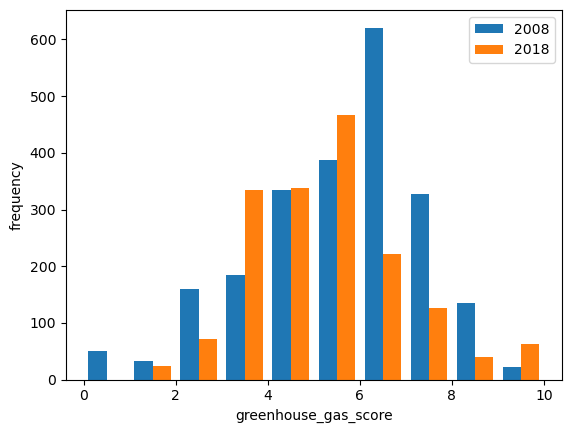

In [298]:
plt.hist([df_08['greenhouse_gas_score'], df_18['greenhouse_gas_score']], label=['2008', '2018'])
plt.xlabel('greenhouse_gas_score')
plt.ylabel('frequency')
plt.legend()

In [299]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 2255 non-null   object 
 1   displ                 2255 non-null   float64
 2   cyl                   2255 non-null   float64
 3   trans                 2255 non-null   object 
 4   drive                 2255 non-null   object 
 5   fuel                  2255 non-null   object 
 6   cert_region           2255 non-null   object 
 7   stnd                  2255 non-null   object 
 8   underhood_id          2255 non-null   object 
 9   veh_class             2255 non-null   object 
 10  air_pollution_score   2255 non-null   float64
 11  city_mpg              2255 non-null   float64
 12  hwy_mpg               2255 non-null   float64
 13  cmb_mpg               2255 non-null   float64
 14  greenhouse_gas_score  2255 non-null   int32  
 15  smartway             

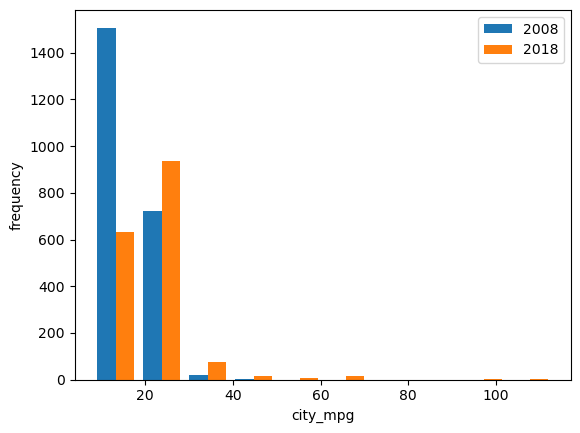

In [300]:
plt.hist([df_08['city_mpg'], df_18['city_mpg']], label=['2008', '2018'])
plt.xlabel('city_mpg')
plt.ylabel('frequency')
plt.legend()

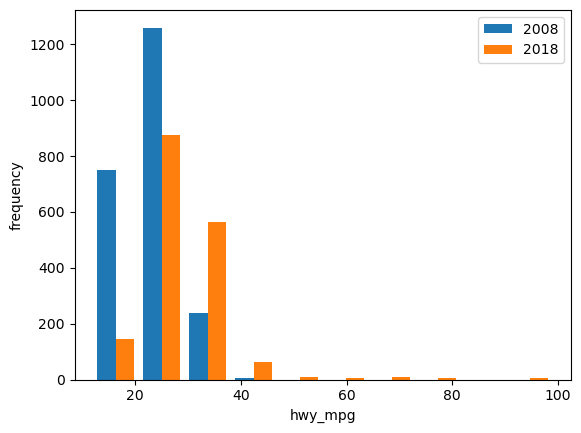

In [301]:
plt.hist([df_08['hwy_mpg'], df_18['hwy_mpg']], label=['2008', '2018'])
plt.xlabel('hwy_mpg')
plt.ylabel('frequency')
plt.legend()

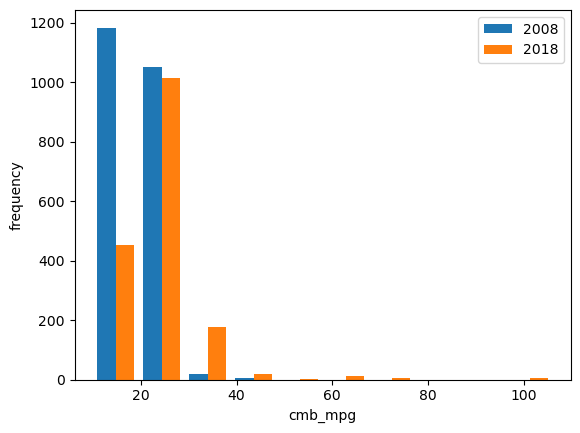

In [302]:
plt.hist([df_08['cmb_mpg'], df_18['cmb_mpg']], label=['2008', '2018'])
plt.xlabel('cmb_mpg')
plt.ylabel('frequency')
plt.legend()

In [303]:
df_08['fuel'].value_counts()

Gasoline    2113
ethanol       67
gas           66
diesel         7
CNG            2
Name: fuel, dtype: int64

In [304]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

33

In [305]:
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

28

Text(0, 0.5, 'Number of Models')

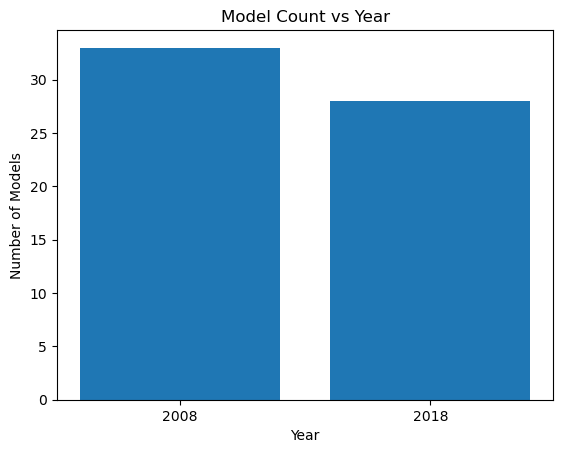

In [306]:
plt.bar(["2008", "2018"], [alt_08,alt_18])
plt.title("Model Count vs Year")
plt.xlabel("Year")
plt.ylabel("Number of Models")

In [307]:
df_08['veh_class'].value_counts()

small car        693
SUV              652
pickup           279
midsize car      278
large car        133
station wagon    123
van               58
minivan           39
Name: veh_class, dtype: int64

In [308]:
df_18['veh_class'].value_counts()

small car          576
midsize car        280
small SUV          220
large car          177
standard SUV       172
pickup             156
station wagon       70
special purpose     24
minivan             10
Name: veh_class, dtype: int64

In [309]:
imp = df_18.groupby('veh_class')['cmb_mpg'].mean() - df_08.groupby('veh_class')['cmb_mpg'].mean()
imp.dropna(inplace=True)
imp

veh_class
large car        5.049573
midsize car      6.450925
minivan          2.133333
pickup           2.449959
small car        4.322511
station wagon    5.136121
Name: cmb_mpg, dtype: float64

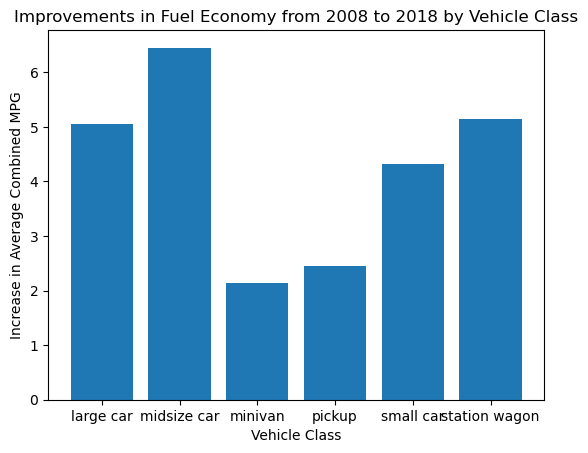

In [310]:
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');
plt.bar(imp.index, imp)
plt.show()

In [311]:
df_08_sw = df_08.query("smartway == \"yes\"")
df_08_sw = df_08_sw.describe().mean()
df_08_sw

displ                    81.085263
cyl                      82.952375
air_pollution_score      84.453595
city_mpg                 98.241563
hwy_mpg                 102.245691
cmb_mpg                  99.533728
greenhouse_gas_score     84.478202
dtype: float64

In [312]:
df_18_sw = df_18.query("smartway == \"Yes\" or smartway == \"Elite\"")
df_18_sw = df_18_sw.describe().mean()
df_18_sw

displ                   28.624155
cyl                     30.293738
air_pollution_score     31.120907
city_mpg                61.780104
hwy_mpg                 63.810846
cmb_mpg                 62.389704
greenhouse_gas_score    33.264392
dtype: float64

In [313]:
imp = df_08_sw - df_18_sw
imp

displ                   52.461108
cyl                     52.658637
air_pollution_score     53.332688
city_mpg                36.461459
hwy_mpg                 38.434846
cmb_mpg                 37.144024
greenhouse_gas_score    51.213809
dtype: float64

<AxesSubplot:>

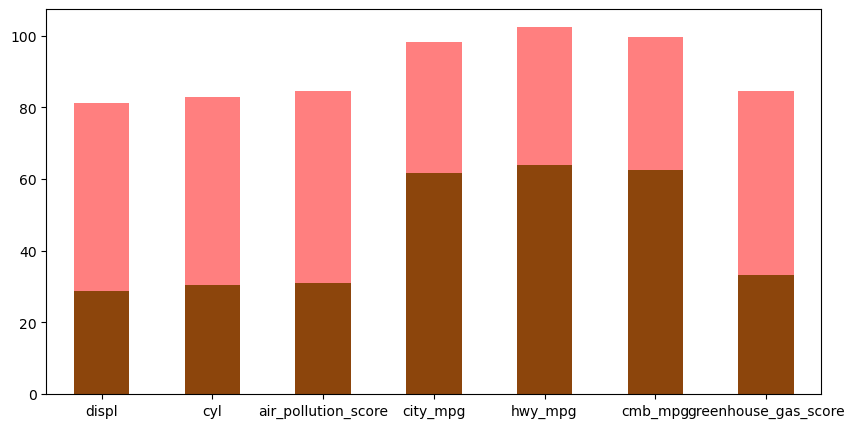

In [314]:
df_18_sw.plot.bar(rot=0, figsize=(10,5), color='g', alpha=0.9)
df_08_sw.plot.bar(rot=0, figsize=(10,5), color='r', alpha=0.5)

### Merge

In [315]:
df_08.columns = df_08.columns + "_2008"
df_08

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_region_2008,stnd_2008,underhood_id_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_gas_score_2008,smartway_2008
0,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6.0,15.0,20.0,17.0,4,no
2,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7.0,17.0,22.0,19.0,5,no
3,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6.0,17.0,22.0,19.0,5,no
4,ACURA RL,3.5,6.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7.0,16.0,24.0,19.0,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,MITSUBISHI Raider,4.7,8.0,Auto-L5,4WD,gas,FA,B8,8CRXT04.7PJP,pickup,3.0,14.0,19.0,15.0,3,no
2251,NISSAN Armada,5.6,8.0,Auto-L5,2WD,gas,FA,B5,8NSXT05.6G9B,SUV,6.0,12.0,18.0,14.0,2,no
2252,NISSAN Armada,5.6,8.0,Auto-L5,4WD,gas,FA,B5,8NSXT05.6G9B,SUV,6.0,12.0,17.0,14.0,2,no
2253,NISSAN Titan,5.6,8.0,Auto-L5,2WD,gas,FA,B5,8NSXT05.6G9B,pickup,6.0,12.0,17.0,14.0,2,no


In [318]:
df_combined = df_08.merge(df_18, how='inner', left_on='model_2008', right_on='model')
df_combined

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_region_2008,stnd_2008,underhood_id_2008,veh_class_2008,...,cert_region,stnd,underhood_id,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,...,FA,T3B125,JHNXT03.5GV3,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,...,CA,U2,JHNXT03.5GV3,small SUV,3.0,20.0,28.0,23.0,5,No
2,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,...,FA,T3B125,JHNXT03.5GV3,small SUV,3.0,19.0,27.0,22.0,4,No
3,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,...,CA,U2,JHNXT03.5GV3,small SUV,3.0,19.0,27.0,22.0,4,No
4,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,...,FA,T3B125,JHNXT03.5GV3,small SUV,3.0,20.0,28.0,23.0,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,VOLVO XC 90,4.4,8.0,Auto-S6,4WD,Gasoline,FA,B5,8VVXB04.4U2N,SUV,...,FA,T3B70,JVVXJ02.0B70,standard SUV,5.0,20.0,27.0,23.0,5,No
6284,VOLVO XC 90,4.4,8.0,Auto-S6,4WD,Gasoline,FA,B5,8VVXB04.4U2N,SUV,...,CA,L3SULEV30,JVVXJ02.0P30,standard SUV,7.0,26.0,30.0,27.0,10,Elite
6285,VOLVO XC 90,4.4,8.0,Auto-S6,4WD,Gasoline,FA,B5,8VVXB04.4U2N,SUV,...,FA,T3B30,JVVXJ02.0P30,standard SUV,7.0,26.0,30.0,27.0,10,Elite
6286,VOLVO XC 90,4.4,8.0,Auto-S6,4WD,Gasoline,FA,B5,8VVXB04.4U2N,SUV,...,CA,L3SULEV30,JVVXJ02.0P30,standard SUV,7.0,63.0,61.0,62.0,10,Elite


In [353]:
model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]
model_mpg

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000
...,...,...
TOYOTA Yaris,31.500000,32.500000
VOLKSWAGEN Jetta,24.166667,30.000000
VOLKSWAGEN Passat,21.250000,29.000000


In [358]:
N = model_mpg.shape[0]
ind = np.arange(N) 
width = 0.25

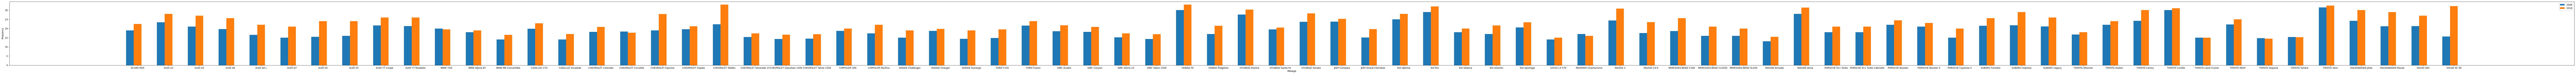

In [363]:
fig = plt.figure(figsize=(200, 5))
plt.bar(ind, model_mpg['cmb_mpg_2008'], width, label='2008')
plt.bar(ind + width, model_mpg['cmb_mpg'], width, label='2018')
plt.xlabel('Mileage')
plt.ylabel('frequency')
plt.xticks(ind+width, model_mpg.index)
plt.legend()